In [1]:
!pip install inflection
!pip install imbalanced-learn
!pip install hyperopt

   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   -- ----------------------------

In [349]:
import pandas as pd
import numpy as np

# formatting
import inflection

#plotting
from matplotlib import pyplot as plt
import seaborn as sns

# encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# scaling
from sklearn.preprocessing import MinMaxScaler

# oversampling
from imblearn.over_sampling import SMOTE

# metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# model evaluation & tuning hyperparameter
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

# models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from hyperopt import hp, tpe, fmin, Trials

import warnings
from sklearn.exceptions import DataConversionWarning

# Suppress FutureWarning and DataConversionWarning
warnings.filterwarnings(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [378]:
# Dataset loading
data = pd.read_csv("churn.csv")

In [380]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [382]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [384]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [386]:
# Removing irrelevant column
data.drop('customerID', axis=1, inplace=True)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [388]:
# renaming the column to snake_case format

column_list = list(data.columns)

for i, col in enumerate(column_list):
  column_list[i] = inflection.underscore(column_list[i]).replace(' ', '_')

data.columns = column_list
data.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [390]:
# Seperating numerical and catogerical data

# numerical
column_numerical = ['tenure', 'monthly_charges', 'total_charges']

# categorical
column_categorical = list(data.columns)
column_categorical.remove('tenure')
column_categorical.remove('monthly_charges')
column_categorical.remove('total_charges')

data_type_general = dict()

for col in data.columns:
  if col in column_numerical:
    data_type_general[col] = 'numerical'
  else:
    data_type_general[col] = 'categorical'

tmp = pd.Series(data_type_general)
data_type_general = pd.DataFrame(tmp).T.rename({0:'general data types'})
data_type_general

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
general data types,categorical,categorical,categorical,categorical,numerical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,numerical,numerical,categorical


In [392]:
column_categorical

['gender',
 'senior_citizen',
 'partner',
 'dependents',
 'phone_service',
 'multiple_lines',
 'internet_service',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'contract',
 'paperless_billing',
 'payment_method',
 'churn']

In [394]:
# Datatype of all column
data_type_python = pd.DataFrame(data.dtypes).T.rename({0:'python data types'})
data_type_python

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
python data types,object,int64,object,object,int64,object,object,object,object,object,object,object,object,object,object,object,object,float64,object,object


In [396]:
# data in total charge should be numeric intead of object
data['total_charges'] = pd.to_numeric(data['total_charges'], errors='coerce') # errors = coerce for filling invalid values as nan
data['total_charges'].isna().sum()

11

In [398]:
# Filling nan with 0
data.fillna({'total_charges':0},inplace = True)
data['total_charges'].isna().sum()

0

In [400]:
data.shape

(7043, 20)

In [402]:
data['total_charges'] = data['total_charges'].astype(float)
data.dtypes

gender                object
senior_citizen         int64
partner               object
dependents            object
tenure                 int64
phone_service         object
multiple_lines        object
internet_service      object
online_security       object
online_backup         object
device_protection     object
tech_support          object
streaming_tv          object
streaming_movies      object
contract              object
paperless_billing     object
payment_method        object
monthly_charges      float64
total_charges        float64
churn                 object
dtype: object

In [404]:
data_type_python = pd.DataFrame(data.dtypes).T.rename({0:'python data types'})
data_type_python

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
python data types,object,int64,object,object,int64,object,object,object,object,object,object,object,object,object,object,object,object,float64,float64,object


In [406]:
# For numerical 
variation_numerical = dict()

for col in column_numerical:
  tmp = f'{data[col].min()} - {data[col].max()}'
  variation_numerical[col] = tmp

tmp = pd.Series(variation_numerical)
data_variation_numerical = pd.DataFrame(tmp).T.rename({0:'data variation'})
data_variation_numerical

,tenure,monthly_charges,total_charges
data variation,0 - 72,18.25 - 118.75,0.0 - 8684.8


In [408]:

# For categorical
variation_categorical = dict()

for col in column_categorical:
  tmp = data[col].unique().tolist()
  tmp.sort()
  variation_categorical[col] = ', '.join(str(item) for item in tmp)

tmp = pd.Series(variation_categorical)
data_variation_categorical = pd.DataFrame(tmp).T.rename({0:'data variation'})
data_variation_categorical

,gender,senior_citizen,partner,dependents,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,churn
data variation,"Female, Male","0, 1","No, Yes","No, Yes","No, Yes","No, No phone service, Yes","DSL, Fiber optic, No","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","Month-to-month, One year, Two year","No, Yes","Bank transfer (automatic), Credit card (automa...","No, Yes"


In [410]:
data_variation = pd.concat([data_variation_numerical, data_variation_categorical], axis=1)
data_variation

,tenure,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,churn
data variation,0 - 72,18.25 - 118.75,0.0 - 8684.8,"Female, Male","0, 1","No, Yes","No, Yes","No, Yes","No, No phone service, Yes","DSL, Fiber optic, No","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","Month-to-month, One year, Two year","No, Yes","Bank transfer (automatic), Credit card (automa...","No, Yes"


In [412]:
# replace redundant values
data.replace({'No phone service':'No',
            'No internet service':'No'},
            inplace=True)

In [414]:
variation_categorical = dict()

for col in column_categorical:
  tmp = data[col].unique().tolist()
  tmp.sort()
  variation_categorical[col] = ', '.join(str(item) for item in tmp)

tmp = pd.Series(variation_categorical)
data_variation_categorical = pd.DataFrame(tmp).T.rename({0:'data variation'})

data_variation = pd.concat([data_variation_numerical, data_variation_categorical], axis=1)
data_variation


,tenure,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,churn
data variation,0 - 72,18.25 - 118.75,0.0 - 8684.8,"Female, Male","0, 1","No, Yes","No, Yes","No, Yes","No, Yes","DSL, Fiber optic, No","No, Yes","No, Yes","No, Yes","No, Yes","No, Yes","No, Yes","Month-to-month, One year, Two year","No, Yes","Bank transfer (automatic), Credit card (automa...","No, Yes"


In [416]:
# Summary of the dataset
data_info = pd.concat([data_type_general, data_type_python,
                     data_variation],
                      axis=0)

data_info = data_info.reindex(data.columns, axis=1)
data_info

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
general data types,categorical,categorical,categorical,categorical,numerical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,numerical,numerical,categorical
python data types,object,int64,object,object,int64,object,object,object,object,object,object,object,object,object,object,object,object,float64,float64,object
data variation,"Female, Male","0, 1","No, Yes","No, Yes",0 - 72,"No, Yes","No, Yes","DSL, Fiber optic, No","No, Yes","No, Yes","No, Yes","No, Yes","No, Yes","No, Yes","Month-to-month, One year, Two year","No, Yes","Bank transfer (automatic), Credit card (automa...",18.25 - 118.75,0.0 - 8684.8,"No, Yes"


###|EDA

In [51]:
column_categorical.remove('churn')

In [53]:
df = data.copy()
df.loc[:,'churn'] = df.loc[:, 'churn'].apply(lambda x: 'churn' if x == 'Yes' else 'retain')

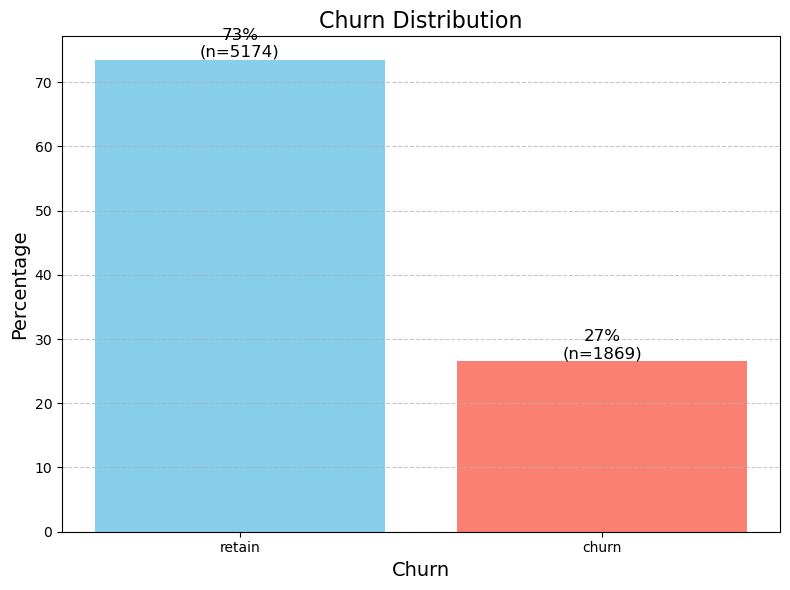

In [418]:
# Data for the bar plot
bar_data = df['churn'].value_counts(normalize=True)
bar_labels = df['churn'].value_counts(normalize=True).index.to_list()


counts = df['churn'].value_counts()
baseline = counts.max() / counts.sum() * 100


# Bar plot
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(bar_labels, bar_data * 100, color=['skyblue', 'salmon'])

# Add labels and percentages on top of each bar
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height,
            f'{height:.0f}%\n(n={counts.iloc[i]})',
            ha='center', va='bottom', fontsize=12)

ax.set_title(f'Churn Distribution (Baseline accuracy = {baseline:.1f}%)', fontsize=16)


# Set plot properties
ax.set_xlabel('Churn', fontsize=14)
ax.set_ylabel('Percentage', fontsize=14)
ax.set_title('Churn Distribution', fontsize=16)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

C:\Users\mohit\AppData\Local\Temp\ipykernel_23544\1839441619.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


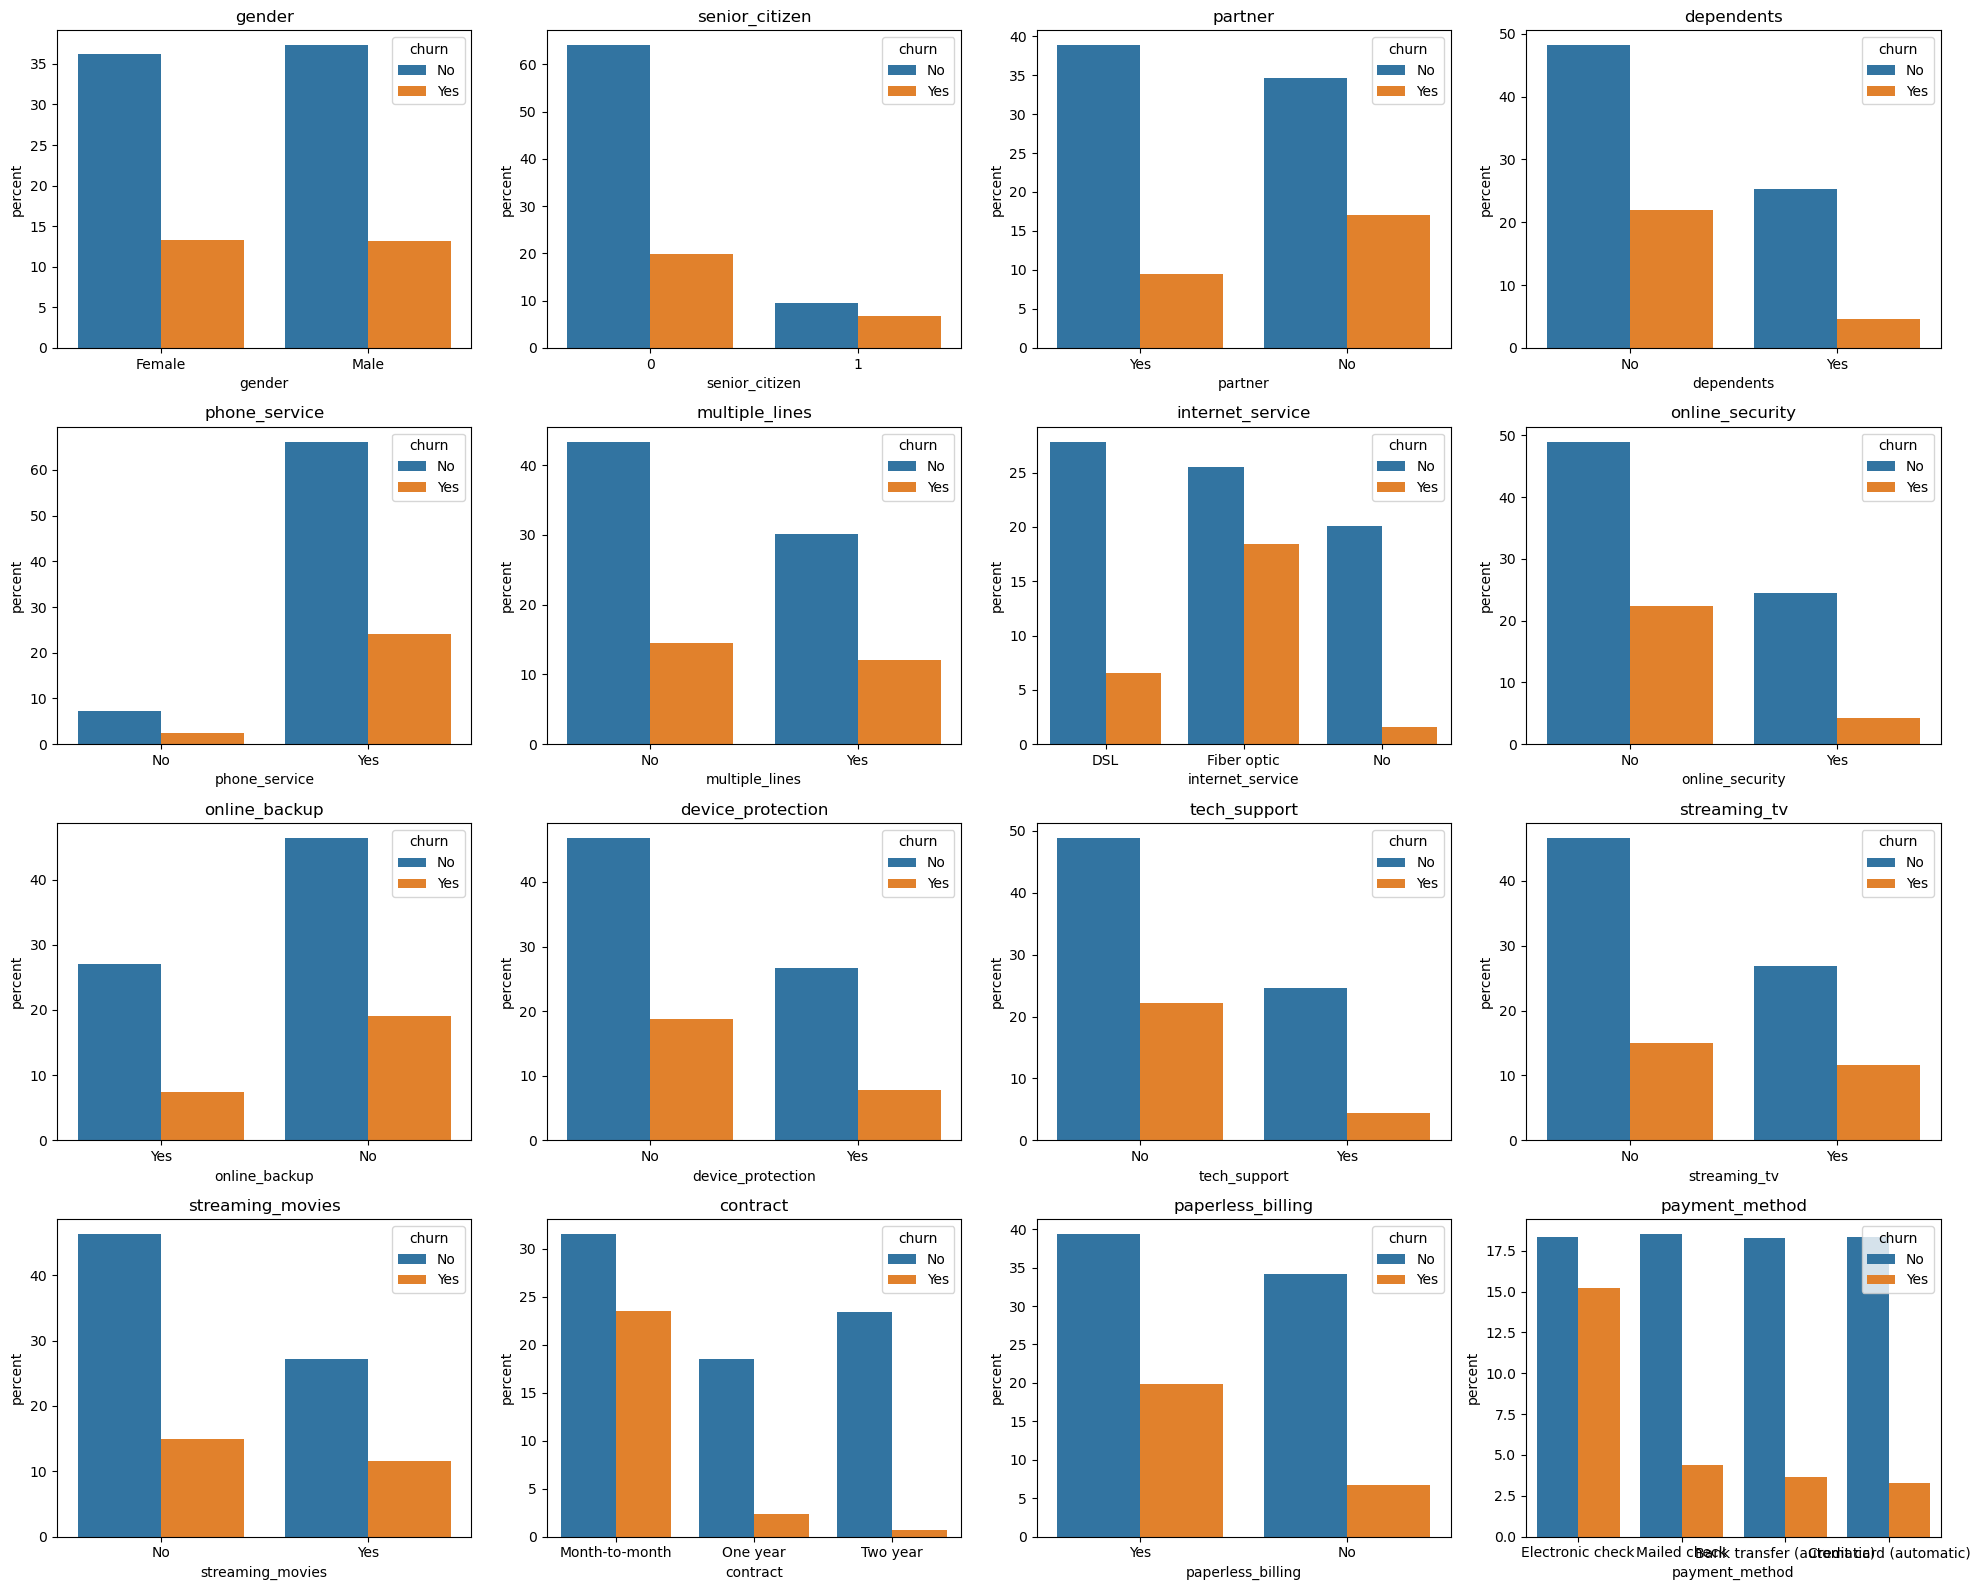

In [420]:
fig, axes = plt.subplots(4, 4, figsize=(20, 16), constrained_layout=True)

# Iterate over predictors and plot each one
for i, predictor in enumerate(data.drop(columns=['churn', 'total_charges', 'monthly_charges', 'tenure'])):
    row = i // 4
    col = i % 4
    ax = axes[row, col]
    sns.countplot(data=data, x=predictor, hue='churn', ax=ax, stat="percent")

    ax.set_title(predictor)

plt.tight_layout()
plt.show()

Gender doesn't have any relation with churn

In [434]:
attr_crosstab = []

for col in column_categorical:
    
    # remove rare categories
    vc = df[col].value_counts()
    valid = vc[vc >= 50].index
    df_filtered = df[df[col].isin(valid)]

    # build crosstab
    ct = pd.crosstab(df_filtered[col], df_filtered["churn"], normalize="index") \
       .rename_axis(None, axis=0) \
       .reset_index()


    # rename first column to "attribute"
    ct.rename(columns={ct.columns[0]: "attribute"}, inplace=True)

    # add column name as prefix
    col_title = inflection.titleize(col)
    ct["attribute"] = ct["attribute"].apply(lambda x: f"{col_title} ({x})")

    attr_crosstab.append(ct)

attr_crosstab = pd.concat(attr_crosstab, ignore_index=True)

# add support & impact for proper ranking
attr_crosstab["support"] = attr_crosstab["churn"] + attr_crosstab["retain"]
attr_crosstab["impact"] = attr_crosstab["churn"] * attr_crosstab["support"]

attr_crosstab = attr_crosstab.sort_values("impact", ascending=False)

attr_crosstab.style.background_gradient()


churn,attribute,churn,retain,support,impact
36,Churn (churn),1.000000,0.000000,1.000000,1.000000
34,Payment Method (Electronic check),0.452854,0.547146,1.000000,0.452854
27,Contract (Month-to-month),0.427097,0.572903,1.000000,0.427097
13,Internet Service (Fiber optic),0.418928,0.581072,1.000000,0.418928
3,Senior Citizen (1),0.416813,0.583187,1.000000,0.416813
31,Paperless Billing (Yes),0.335651,0.664349,1.000000,0.335651
4,Partner (No),0.329580,0.670420,1.000000,0.329580
15,Online Security (No),0.313296,0.686704,1.000000,0.313296
6,Dependents (No),0.312791,0.687209,1.000000,0.312791
21,Tech Support (No),0.311862,0.688138,1.000000,0.311862


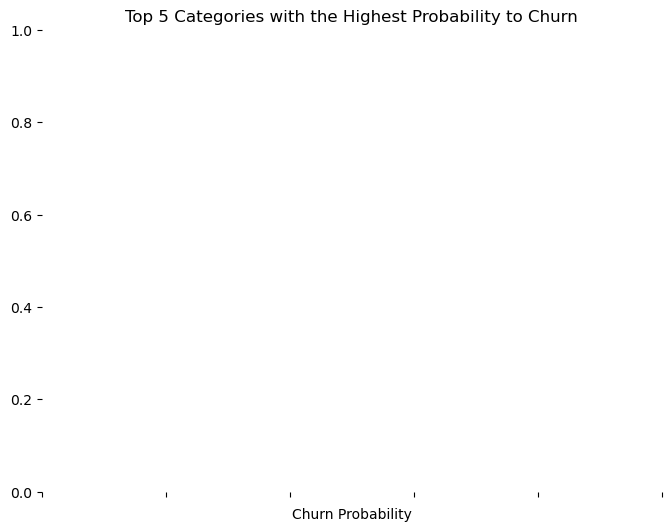

In [438]:
#Top 5 attribute and it's value with highest churn probability
fig, ax = plt.subplots(figsize=(8,6))

sns.barplot(data=attr_crosstab[attr_crosstab["support"] >= 100].sort_values("impact", ascending=False).head(5)
, x='churn', y='attribute', ax=ax, palette=['salmon'], saturation=1)

if ax.containers: ax.bar_label(ax.containers[0], padding=3, fmt='%.2f', fontsize=14, fontweight='medium')

ax.grid(False, axis='y')
ax.set_title('Top 5 Categories with the Highest Probability to Churn')

ax.set_xlim(0, 1)
ax.set_ylabel('')
ax.set_xlabel('Churn Probability')

ax.set_xticklabels([])
sns.despine(left=True, bottom=True)
plt.show()

C:\Users\mohit\AppData\Local\Temp\ipykernel_23544\4035556485.py:4: UserWarning: 
The palette list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=attr_crosstab.iloc[-5:].sort_values('churn'), x='churn', y='attribute', ax=ax, palette=['skyblue'], saturation=1)


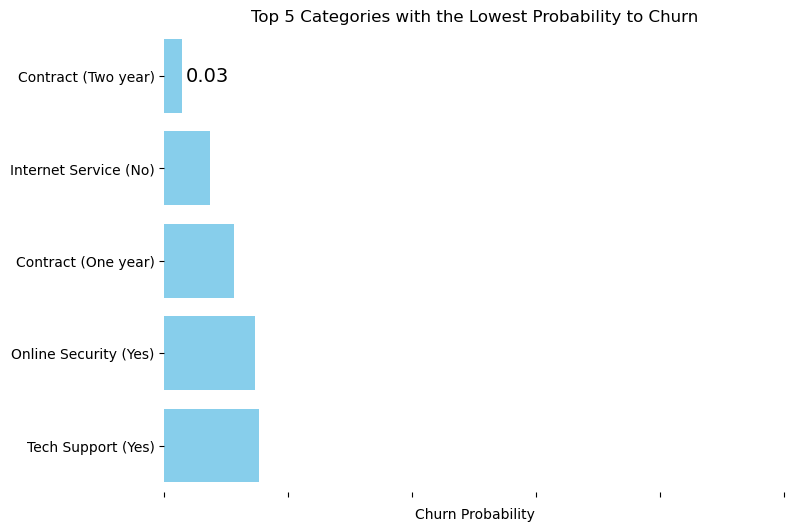

In [69]:
#Top 5 attribute and it's value with lowest churn probability
fig, ax = plt.subplots(figsize=(8,6))

sns.barplot(data=attr_crosstab.iloc[-5:].sort_values('churn'), x='churn', y='attribute', ax=ax, palette=['skyblue'], saturation=1)

ax.bar_label(ax.containers[0], padding=3, fmt='%.2f', fontsize=14, fontweight='medium')
ax.grid(False, axis='y')
ax.set_title('Top 5 Categories with the Lowest Probability to Churn')

ax.set_xlim(0, 1)
ax.set_ylabel('')
ax.set_xlabel('Churn Probability')

ax.set_xticklabels([])
sns.despine(left=True, bottom=True)
plt.show()

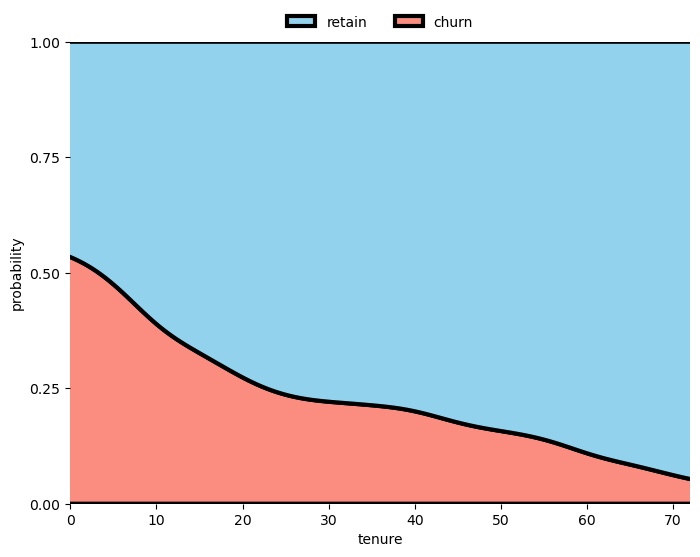

In [71]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.grid(False, axis='x')

# palette colors
palette = ['skyblue', 'salmon']

# Plot the KDE plot
sns.kdeplot(data=df, x='tenure', hue='churn', multiple='fill', linewidth=3, ax=ax, alpha=0.9, palette=palette)

# Move the legend
sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 1), title='', ncol=2, frameon=False)

ax.set_xticks(np.arange(0, df['tenure'].max(), 10))
ax.set_xlim(df['tenure'].min(), df['tenure'].max())

ax.set_yticks(np.linspace(0, 1, 5))
ax.set_ylabel('probability')

sns.despine(left=True, bottom=True)

plt.show()

It is clearly a time series trend , with a negative correlation of tenure with probability of churn

Churn probability by monthly charges

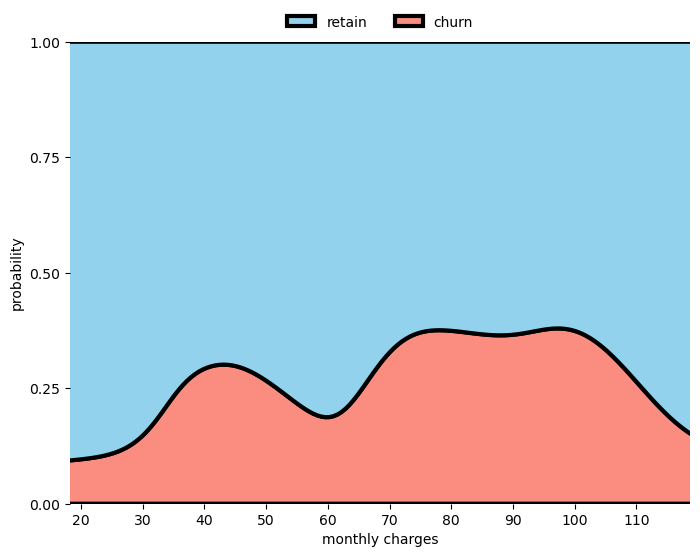

In [74]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.grid(False, axis='x')
sns.kdeplot(data=df, x='monthly_charges', hue='churn', multiple='fill', linewidth=3, ax=ax, alpha=0.9,palette=palette)
sns.move_legend(ax, "lower center", bbox_to_anchor=(0.5, 1), title='', ncol=2, frameon=False)

ax.set_xticks(np.arange(0,df['monthly_charges'].max(),10))
ax.set_xlim(df['monthly_charges'].min(),df['monthly_charges'].max())

ax.set_yticks(np.linspace(0,1,5))
ax.set_ylabel('probability')
ax.set_xlabel('monthly charges')

sns.despine(left=True, bottom=True)

# ax.axis('tight')
plt.show()

#Numerical Data Distribution

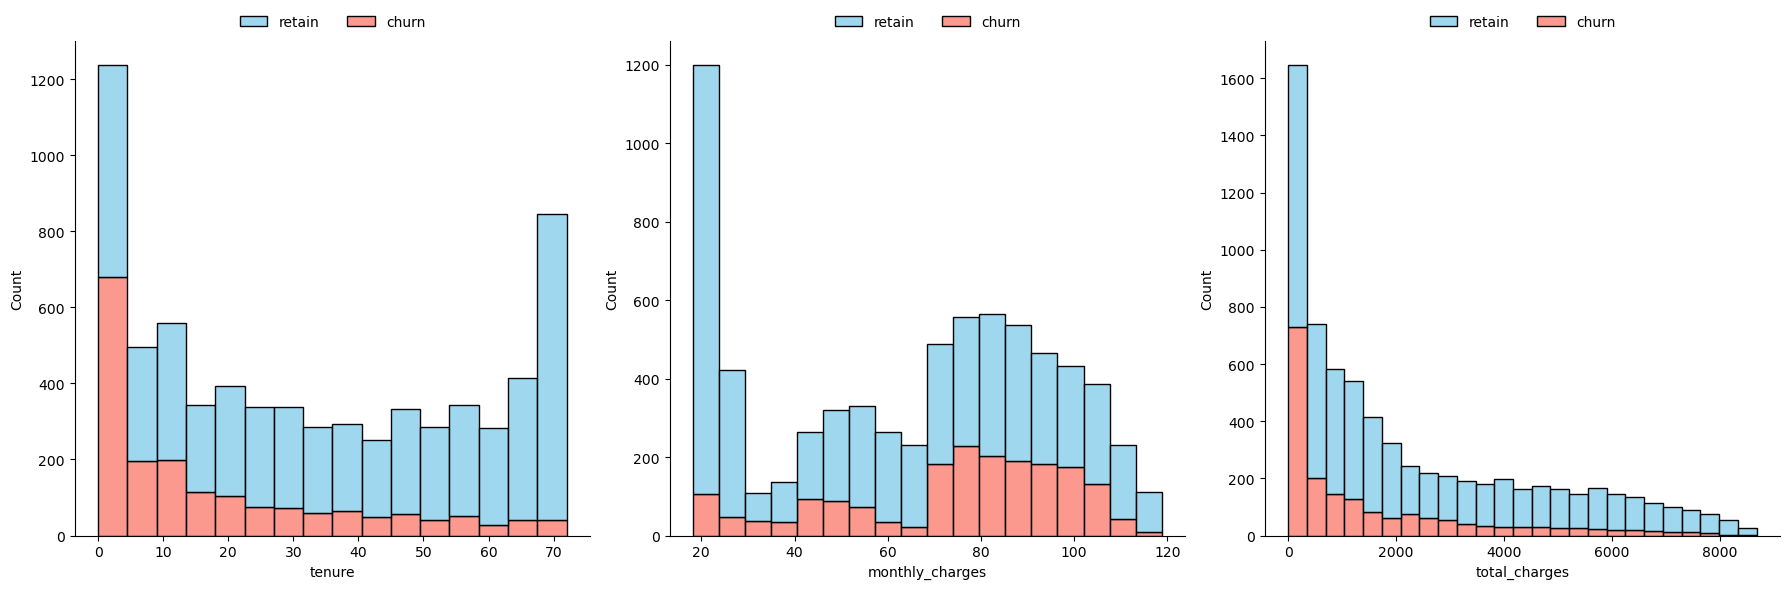

In [79]:
fig, ax = plt.subplots(1, 3, figsize=(18,6))

for i, col in enumerate(column_numerical):
  sns.histplot(data=df, x=col, hue='churn', multiple='stack', ax=ax[i], alpha=0.8,palette=palette)
  sns.move_legend(ax[i], "lower center", bbox_to_anchor=(0.5, 1), ncol=3, title='', frameon=False)

plt.tight_layout()
sns.despine()
plt.show()

Data Preprocessing

In [87]:
data_X = data.drop('churn', axis=1)
data_y = data['churn']

X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.3,
                                                    random_state=1, stratify=data_y)

In [89]:
print('X shape\t\t:', data_X.shape)
print('y shape\t\t:', data_y.shape)
print()
print('X_train shape\t:', X_train.shape)
print('y_train shape\t:', y_train.shape)
print()
print('X_test shape\t:', X_test.shape)
print('y_test shape\t:', y_test.shape)

X shape		: (7043, 19)
y shape		: (7043,)

X_train shape	: (4930, 19)
y_train shape	: (4930,)

X_test shape	: (2113, 19)
y_test shape	: (2113,)


In [440]:
le = LabelEncoder()
encoded_y= le.fit_transform(y_train)

In [442]:
le.classes_

array([0, 1])

In [444]:
encoded_y

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

Using one hot encoding for the input vectors as the feature of the dataset doesn't have any order and also dropping one catogery if feature have only 2 catogery to avoid multicollinearity as 2 catogery features can be assumed to be perfect collinear with value +1 or -1

In [449]:
# ohe for categorical data
column_categorical = [c for c in column_categorical if c != 'churn']

ohe = OneHotEncoder(sparse_output=False, drop='first')
X_ohe = ohe.fit_transform(data_X[column_categorical])

In [451]:
X_ohe

array([[0., 0., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [1., 1., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [453]:
column_ohe = ohe.get_feature_names_out()
column_ohe

array(['gender_Male', 'senior_citizen_1', 'partner_Yes', 'dependents_Yes',
       'phone_service_Yes', 'multiple_lines_Yes',
       'internet_service_Fiber optic', 'internet_service_No',
       'online_security_Yes', 'online_backup_Yes',
       'device_protection_Yes', 'tech_support_Yes', 'streaming_tv_Yes',
       'streaming_movies_Yes', 'contract_One year', 'contract_Two year',
       'paperless_billing_Yes', 'payment_method_Credit card (automatic)',
       'payment_method_Electronic check', 'payment_method_Mailed check'],
      dtype=object)

In [455]:
for i, col in enumerate(column_ohe):
  column_ohe[i] = inflection.underscore(column_ohe[i]).replace(' ', '_').replace('_(automatic)','')

column_ohe

array(['gender_male', 'senior_citizen_1', 'partner_yes', 'dependents_yes',
       'phone_service_yes', 'multiple_lines_yes',
       'internet_service_fiber_optic', 'internet_service_no',
       'online_security_yes', 'online_backup_yes',
       'device_protection_yes', 'tech_support_yes', 'streaming_tv_yes',
       'streaming_movies_yes', 'contract_one_year', 'contract_two_year',
       'paperless_billing_yes', 'payment_method_credit_card',
       'payment_method_electronic_check', 'payment_method_mailed_check'],
      dtype=object)

In [457]:
# With column name
data_x_ohe_cat = pd.DataFrame(X_ohe,columns = column_ohe,index=data_X.index)
data_x_ohe = pd.concat([data_X.drop(columns=column_categorical), data_x_ohe_cat], axis=1)
data_x_ohe.head()

,tenure,monthly_charges,total_charges,gender_male,senior_citizen_1,partner_yes,dependents_yes,phone_service_yes,multiple_lines_yes,internet_service_fiber_optic,...,device_protection_yes,tech_support_yes,streaming_tv_yes,streaming_movies_yes,contract_one_year,contract_two_year,paperless_billing_yes,payment_method_credit_card,payment_method_electronic_check,payment_method_mailed_check
0,1,29.85,29.85,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,34,56.95,1889.50,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,2,53.85,108.15,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,45,42.30,1840.75,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,2,70.70,151.65,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [459]:
scaler = MinMaxScaler()

# fit only on training data
X_train[column_numerical] = scaler.fit_transform(X_train[column_numerical])

# apply same scaling to test data
X_test[column_numerical] = scaler.transform(X_test[column_numerical])


In [461]:
data_x_ohe[column_ohe].head()


,gender_male,senior_citizen_1,partner_yes,dependents_yes,phone_service_yes,multiple_lines_yes,internet_service_fiber_optic,internet_service_no,online_security_yes,online_backup_yes,device_protection_yes,tech_support_yes,streaming_tv_yes,streaming_movies_yes,contract_one_year,contract_two_year,paperless_billing_yes,payment_method_credit_card,payment_method_electronic_check,payment_method_mailed_check
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [463]:
data_x_ohe.shape

(7043, 23)

In [465]:
data_x_fin = pd.concat([X_scale[column_numerical],data_x_ohe[column_ohe]],axis=1)

In [467]:
data_x_fin.head()

,tenure,monthly_charges,total_charges,gender_male,senior_citizen_1,partner_yes,dependents_yes,phone_service_yes,multiple_lines_yes,internet_service_fiber_optic,...,device_protection_yes,tech_support_yes,streaming_tv_yes,streaming_movies_yes,contract_one_year,contract_two_year,paperless_billing_yes,payment_method_credit_card,payment_method_electronic_check,payment_method_mailed_check
0,0.013889,0.115423,0.003437,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.472222,0.385075,0.217564,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.027778,0.354229,0.012453,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.625000,0.239303,0.211951,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.027778,0.521891,0.017462,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [469]:
encoded_y = pd.DataFrame(encoded_y, columns=['churn'])

In [471]:
encoded_y.head()

,churn
0,0
1,0
2,0
3,0
4,1


In [124]:
data_fin = pd.concat([data_x_fin,encoded_y],axis = 1)

In [126]:
data_fin.head()

,tenure,monthly_charges,total_charges,gender_male,senior_citizen_1,partner_yes,dependents_yes,phone_service_yes,multiple_lines_yes,internet_service_fiber_optic,...,tech_support_yes,streaming_tv_yes,streaming_movies_yes,contract_one_year,contract_two_year,paperless_billing_yes,payment_method_credit_card,payment_method_electronic_check,payment_method_mailed_check,churn
0,0.013889,0.115423,0.003437,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
1,0.472222,0.385075,0.217564,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
2,0.027778,0.354229,0.012453,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
3,0.625000,0.239303,0.211951,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
4,0.027778,0.521891,0.017462,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1


In [128]:
data.shape,data_fin.shape

((7043, 20), (7043, 24))

## Correlation

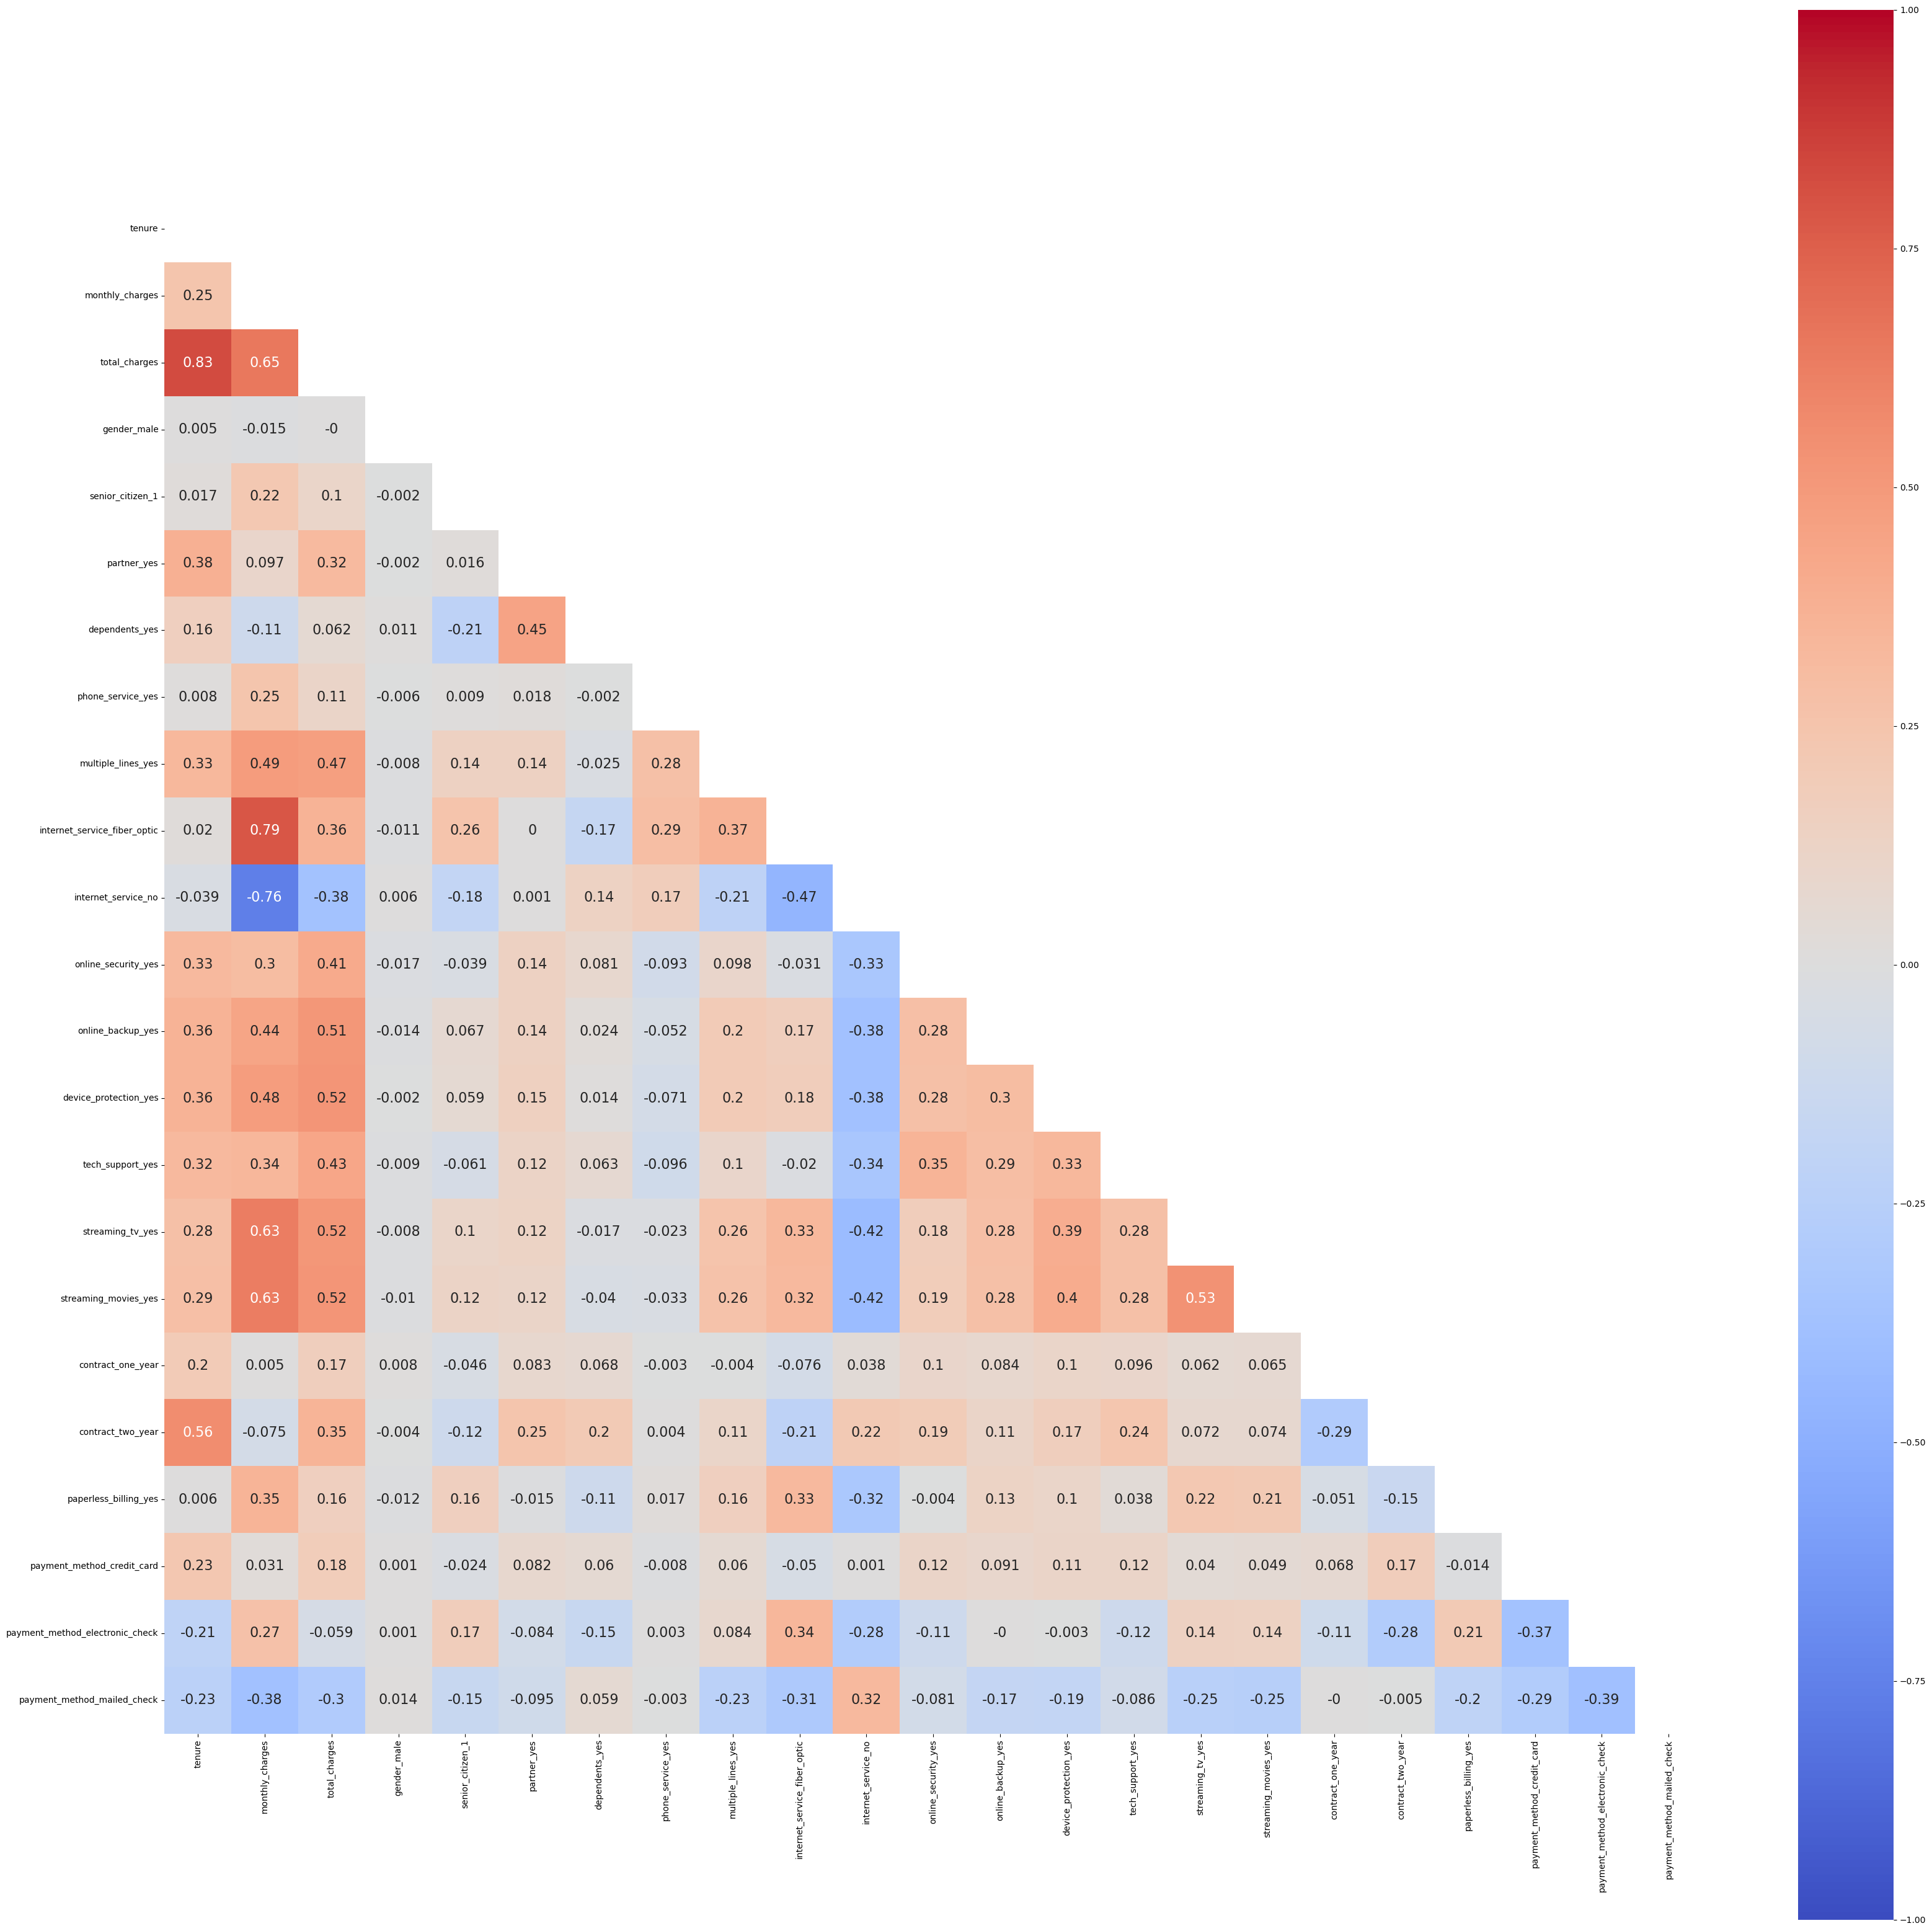

In [473]:
# keep only numerical + encoded churn
num_cols = data_fin.select_dtypes(include=['int64','float64']).columns

corr_matrix = data_fin[num_cols].corr().round(3)

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

fig, ax = plt.subplots(figsize=(40,40))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, cmap='coolwarm',
            mask=mask, square=True, annot=True,
            annot_kws={'fontsize':16}, ax=ax)

plt.show()


## Score Function

In [475]:
def get_score(y_pred_list, y_test, plot=True, axis=0, cmap='Blues'):
  model_name = []
  accuracy = []
  precision = []
  recall = []
  f1 = []

  for name, y_pred in y_pred_list.items():
    model_name.append(name)
    accuracy.append(accuracy_score(y_test, y_pred))
    precision.append(precision_score(y_test, y_pred, pos_label=1))
    recall.append(recall_score(y_test, y_pred, pos_label=1))
    f1.append(f1_score(y_test, y_pred, pos_label=1))


  score_list = {
        'model':model_name,
        'accuracy':accuracy,
        'precision':precision,
        'recall':recall,
        'f1_score':f1,
      }

  score_df = pd.DataFrame(score_list).set_index('model')

  if plot:
    display(score_df.style.background_gradient(axis=axis, cmap=cmap))

  return score_df

Model list with default parameters

In [478]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

In [480]:

scale = (y_train == 0).sum().values[0] / (y_train == 1).sum().values[0]


In [482]:
model_list = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=1, class_weight = 'balanced'),
    'KNN': Pipeline([
        ('smote', SMOTE(random_state=1)),
        ('knn', KNeighborsClassifier())
    ]),
    'SVM': SVC(kernel='rbf', C=1.0, gamma='scale', random_state=1),
    

  

    }

In [484]:
model_list['XGBoost'] = XGBClassifier(
    learning_rate=0.03,
    n_estimators=300,
    max_depth=best_params1['max_depth'],        # from your earlier tuning
    min_child_weight=best_params1['min_child_weight'],
    gamma=best_gamma['gamma'],
    subsample=best_sampling['subsample'],
    colsample_bytree=best_sampling['colsample_bytree'],
    scale_pos_weight=scale,                     # your neg/pos ratio
    eval_metric='logloss',
    random_state=42
)


In [509]:
encoded_y = data.loc[data_x_fin.index, 'churn']
encoded_y = (encoded_y == 'Yes').astype(int)



In [511]:
X_train,X_test,y_train,y_test = train_test_split(data_x_fin,encoded_y,test_size=0.30)


In [513]:
X_train

,tenure,monthly_charges,total_charges,gender_male,senior_citizen_1,partner_yes,dependents_yes,phone_service_yes,multiple_lines_yes,internet_service_fiber_optic,...,device_protection_yes,tech_support_yes,streaming_tv_yes,streaming_movies_yes,contract_one_year,contract_two_year,paperless_billing_yes,payment_method_credit_card,payment_method_electronic_check,payment_method_mailed_check
6880,1.000000,0.069154,0.205802,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2905,0.291667,0.606468,0.200632,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5821,0.958333,0.080100,0.203062,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
5584,0.152778,0.619403,0.103272,1.0,0.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1142,0.152778,0.566667,0.089271,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6640,0.388889,0.323881,0.159681,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
164,0.152778,0.023383,0.026932,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
840,0.763889,0.813433,0.634361,0.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
2136,0.208333,0.723881,0.164661,1.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [515]:
X_train.columns


Index(['tenure', 'monthly_charges', 'total_charges', 'gender_male',
       'senior_citizen_1', 'partner_yes', 'dependents_yes',
       'phone_service_yes', 'multiple_lines_yes',
       'internet_service_fiber_optic', 'internet_service_no',
       'online_security_yes', 'online_backup_yes', 'device_protection_yes',
       'tech_support_yes', 'streaming_tv_yes', 'streaming_movies_yes',
       'contract_one_year', 'contract_two_year', 'paperless_billing_yes',
       'payment_method_credit_card', 'payment_method_electronic_check',
       'payment_method_mailed_check'],
      dtype='object')

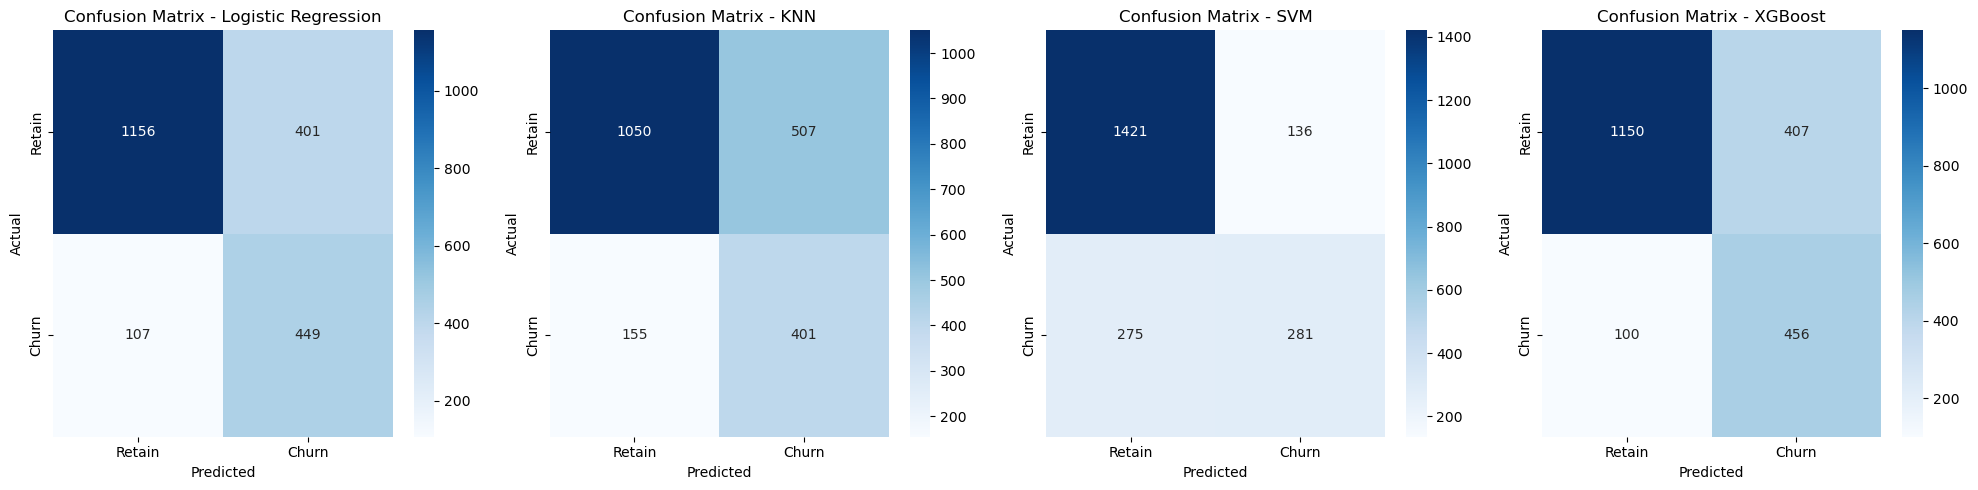

In [517]:
def get_score(y_pred_list, y_test):
    score_dict = {}
    
    # Create a figure for confusion matrices with one plot for each model
    fig, axes = plt.subplots(1, len(y_pred_list), figsize=(20, 5))  # Adjusting layout for number of models

   
    for (model_name, y_pred), ax in zip(y_pred_list.items(), axes.flatten()):
        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        score_dict[model_name] = accuracy
        
        # Plot confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Retain', 'Churn'], yticklabels=['Retain', 'Churn'], ax=ax)
        ax.set_xlabel('Predicted')
        ax.set_ylabel('Actual')
        ax.set_title(f'Confusion Matrix - {model_name}')
    
    plt.tight_layout()
    plt.show()
    
    return score_dict

# Fit the models and generate predictions
y_pred_list = dict()

for name, model in model_list.items():
    model.fit(X_train, y_train)
    y_pred_list[name] = model.predict(X_test)

score = get_score(y_pred_list, y_test)

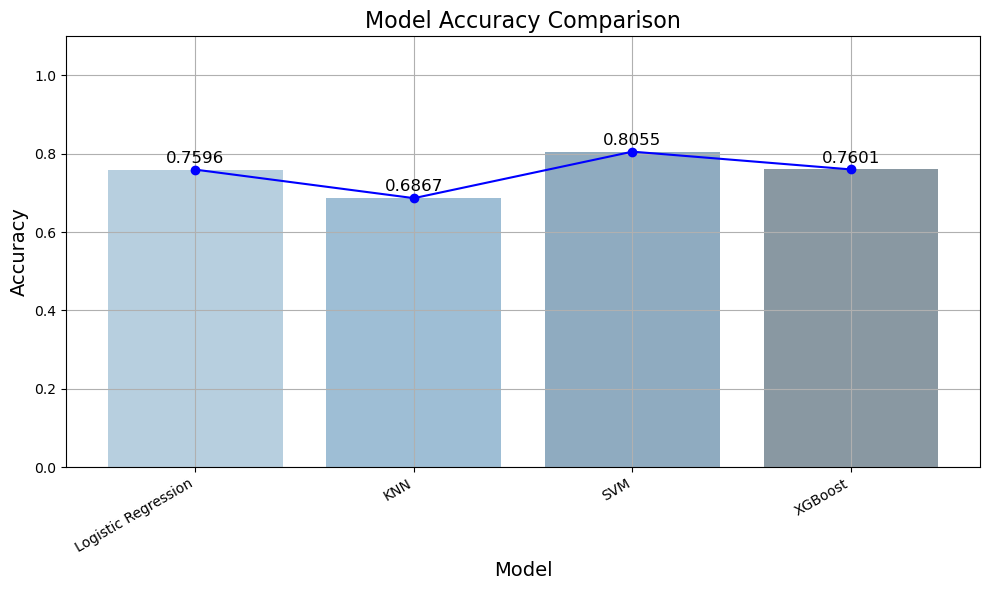

In [518]:
# Plotting the combined graph
plt.figure(figsize=(10, 6))

# Bar plot for accuracies
sns.barplot(x=list(score.keys()), y=list(score.values()), palette='Blues_d', alpha=0.6)

# Line plot for accuracies
plt.plot(list(score.keys()), list(score.values()), marker='o', linestyle='-', color='b')

# Adding annotations for accuracy values on each point
for i, acc in enumerate(score.values()):
    plt.text(i, acc + 0.01, f"{acc:.4f}", ha='center', va='bottom', fontsize=12)

# Adding titles and labels
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.xticks(rotation=30, ha='right')
plt.ylim(0, 1.1)

plt.grid(True)
plt.tight_layout()
plt.show()

XGBoost is the best model here because it has the accuracy (76%) and a good balance between precision and recall, leading to the best F1-score 65%